In [7]:
%load_ext autoreload
%autoreload 2

import os, sys, random
path, _ = os.path.split(os.getcwd())
sys.path.append(path)

# DDQN Learner

## V1 (v1_full_04_03_18.h5) run

In [5]:
# """ DNN Q-Learning Approximator """


# class DDQNLearner(Agent):

#     """ Reference: https://keon.io/deep-q-learning/ """

#     def __init__(self, env):
#         super().__init__(env)
#         # Replay memory
#         self.memory = list()
#         self.max_memory = 10 ** 7  # number of previous transitions to remember

#         self.gamma = 0.95  # discount rate
#         self.epsilon = 1.0  # exploration rate
#         self.epsilon_min = 0.01
#         self.epsilon_decay = 0.99
#         self.learning_rate = 0.001
#         self.batch_size = 10**3
#         self._model = self._build_model()

#         self.timer = time.time()

#     def _check_stall(self) -> None:
#         """ Avoids stalling during training """

#         delta = time.time()

#         if delta - self.timer > 20:
#             self.env.reset()
#             self.timer = time.time()
#             print("Resetting due to stall")

#         return None

#     def _huber_loss(self, y_true: float, y_pred: float) -> float:
#         """ Compute Huber Loss 
        
#         References: https://en.wikipedia.org/wiki/Huber_loss
#                 https://www.tensorflow.org/api_docs/python/tf/losses/huber_loss
#         """
#         return K.mean(K.sqrt(1 + K.square(y_pred - y_true)) - 1, axis=-1)

#     def _build_model(self):
#         """ Create our DNN model for Q-value approximation """

#         model = Sequential()

#         model.add(Dense(12, kernel_initializer="normal", input_shape=(3, 2)))
#         model.add(Activation("relu"))

#         model.add(Dense(30, kernel_initializer="normal"))
#         model.add(Activation("relu"))

#         model.add(Dense(20, kernel_initializer="normal"))
#         model.add(Activation("relu"))

#         model.add(Dense(4, kernel_initializer="random_uniform"))
#         model.add(Activation("linear"))

#         rms = (
#             RMSprop()
#         )  # RMS is used since it is adaptive and our "dataset is not fixed"
#         model.compile(loss=self._huber_loss, optimizer=rms)

#         print(model.summary())

#         return model

#     def remember(self, state: State, action: str, reward: int, next_state: State):
#         """ Push data into memory for replay later """
#         self.memory.append((state, action, reward, next_state))

#     def get_action(self, state: State) -> str:
#         """ Apply an espilon-greedy policy to pick next action """

#         # Helps over fitting, encourages to exploration
#         if np.random.uniform(0, 0.8) < self.epsilon:
#             return np.random.choice(self.env.actions)

#         # Compute rewards for any posible action
#         rewards = self._model.predict([np.array([state])], batch_size=1)
#         idx = np.argmax(rewards[0][0])
#         return self.env.actions[idx]

#     def update(self, iterations: int) -> None:
#         """ Experience replay """

#         # Update model in intervals
#         if iterations > self.batch_size and iterations % self.batch_size == 0:

#             # Avoids stalling
#             self._check_stall()

#             # Governs how much history is stored in memory
#             if len(self.memory) > self.max_memory:
#                 self.memory.pop()

#             print("Updating replay")

#             minibatch = random.sample(self.memory, self.batch_size)
#             for state, action, reward, next_state in minibatch:
#                 target = self._model.predict(np.array([next_state]))
#                 reward += self.gamma * target[0][0].max()

#                 # Update action we should take, then break out of loop
#                 for i in range(len(self.env.actions)):
#                     if action == self.env.actions[i]:
#                         target[0][0][i] = reward
#                         break

#                 self._model.fit(np.array([state]), target, epochs=1, verbose=0)

#             if self.epsilon > self.epsilon_min:
#                 self.epsilon *= self.epsilon_decay

#     def load_model(self, path: str) -> None:
#         """ Load a model"""

#         self.model_path = path
#         self._model.load_weights(path)
#         print("Model loaded")

#     def save_model(self, path: str = "", epoch: int = 0) -> None:
#         """ Save a model """
#         # If we are not given a path, use the same path as the one we loaded the model
#         if not path:
#             path = self.model_path

#         # Create path with epoch number
#         head, ext = os.path.splitext(path)
#         path = get_model_path(f"{head}_{epoch}" + ext)
#         self._model.save_weights(path)


## Analysis of V1 model

In [10]:
import pandas as pd

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def sxs(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        images[i] = np.rot90(images[i])
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')

    plt.tight_layout()
    plt.show()

In [12]:
filename = os.path.join(path, "results/v1_full_04_03_19.csv")

In [13]:
df = pd.read_csv(filename)

In [15]:
df = df.drop(["Unnamed: 0"], axis=1)

In [17]:
df.columns = ["agent", "opponent"]

<Figure size 432x288 with 0 Axes>

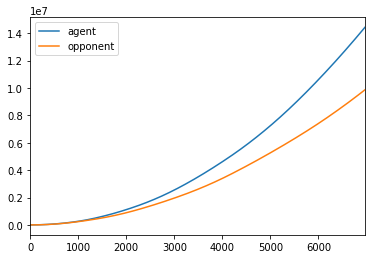

In [18]:
# Cumulatve sum of points during training
plt.figure()
df.cumsum().plot()